In [1]:
from __future__ import division
from textblob import TextBlob
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
with open('data/trip_reports.json', 'rb') as f:
    data = f.readlines()

data = map(lambda x: x.rstrip(), data)
data_json_str = "[" + ','.join(data) + "]"
df = pd.read_json(data_json_str)

## Sentiment analysis
Adding a column for sentiment 

In [5]:
def detect_sentiment(text):
    text = re.sub(r'/\u\d+', '', text)
    text = ''.join([char for char in text if char not in string.punctuation])
    return TextBlob(text.encode('ascii', 'ignore') ).sentiment.polarity

In [6]:
df['TextBlobSentiment'] = [detect_sentiment(t['Text']) for t in df['Report']]

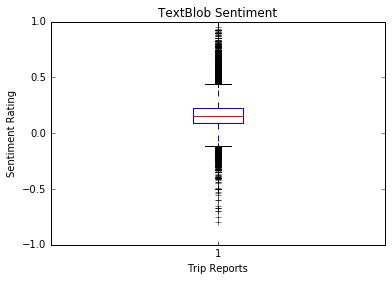

In [7]:
_=plt.boxplot(df['TextBlobSentiment'])
plt.title('TextBlob Sentiment')
plt.ylabel('Sentiment Rating')
plt.xlabel('Trip Reports')

In [8]:
print '20th Percentile: ', np.percentile(df['TextBlobSentiment'], 20)
print '40th Percentile: ', np.percentile(df['TextBlobSentiment'], 40)
print '60th Percentile: ', np.percentile(df['TextBlobSentiment'], 60)
print '80th Percentile: ', np.percentile(df['TextBlobSentiment'], 80)

20th Percentile:  0.0741324307501
40th Percentile:  0.12879503367
60th Percentile:  0.179433020683
80th Percentile:  0.25


In [9]:
def setRating(sentiment):
    """Sets rating based on textblob sentiment"""
    if sentiment < 0.0741324307501:
        return 1
    elif sentiment < 0.12879503367:
        return 2
    elif sentiment < 0.179433020683:
        return 3
    elif sentiment < 0.25:
        return 4
    else:
        return 5

In [10]:
df['Rating'] = df['TextBlobSentiment'].apply(setRating)

In [11]:
df.head()

,Name,Report,_id,TextBlobSentiment,Rating
0,Grand Park via Lake Eleanor,"{u'Date': u'Jul 23, 2016', u'Text': u'Wonderfu...",{u'$oid': u'579689967c6fb81006eeb937'},0.215000,4
1,Grand Park via Lake Eleanor,"{u'Date': u'Jul 17, 2016', u'Text': u'Hit the ...",{u'$oid': u'579689977c6fb81006eeb938'},0.179529,4
2,Grand Park via Lake Eleanor,"{u'Date': u'Jul 16, 2016', u'Text': u'I hiked ...",{u'$oid': u'579689977c6fb81006eeb939'},0.114120,2
3,Grand Park via Lake Eleanor,"{u'Date': u'Jul 15, 2016', u'Text': u'(Revisit...",{u'$oid': u'579689977c6fb81006eeb93a'},0.181702,4
4,Grand Park via Lake Eleanor,"{u'Date': u'Jul 15, 2016', u'Text': u'Nice hik...",{u'$oid': u'579689977c6fb81006eeb93b'},0.200000,4


## Add ids for people and hikes

In [12]:
df['author'] = [r['Creator'].strip() for r in df['Report']]

In [13]:
authors = np.unique(df.author)

In [14]:
ider = dict(zip(authors, range(len(authors))))

In [15]:
df['authorId'] = [ider[r] for r in df['author']]

In [16]:
df.head()

,Name,Report,_id,TextBlobSentiment,Rating,author,authorId
0,Grand Park via Lake Eleanor,"{u'Date': u'Jul 23, 2016', u'Text': u'Wonderfu...",{u'$oid': u'579689967c6fb81006eeb937'},0.215000,4,SpartanHiker,10377
1,Grand Park via Lake Eleanor,"{u'Date': u'Jul 17, 2016', u'Text': u'Hit the ...",{u'$oid': u'579689977c6fb81006eeb938'},0.179529,4,DKreuger,2487
2,Grand Park via Lake Eleanor,"{u'Date': u'Jul 16, 2016', u'Text': u'I hiked ...",{u'$oid': u'579689977c6fb81006eeb939'},0.114120,2,Cascadian Hiker,1948
3,Grand Park via Lake Eleanor,"{u'Date': u'Jul 15, 2016', u'Text': u'(Revisit...",{u'$oid': u'579689977c6fb81006eeb93a'},0.181702,4,Alien Dave,492
4,Grand Park via Lake Eleanor,"{u'Date': u'Jul 15, 2016', u'Text': u'Nice hik...",{u'$oid': u'579689977c6fb81006eeb93b'},0.200000,4,"[email protected]/* <![CDATA[ */!function(t,e,...",12210


In [17]:
hike_data= pd.read_csv('data/washington_hikes_clean.csv')

In [18]:
hike_data.head()

,Unnamed: 0,hike_name,region,length,elevation gain,rating,number_votes,features,"pass(0-no pass, 1- pass required)",which_pass,time_from_seattle,url,latlong,numReports,hike_desc,stars,total_dist,lat_long
0,0,Grand Park via Lake Eleanor,Mount Rainier Area -- NE - Sunrise/White River,"8.0 miles, roundtrip",1100.0,4.25 out of 5,12.0,"[Mountain views, Wildlife, Established campsites]",0,No pass or permit required,116.533333,http://www.wta.org/go-hiking/hikes/grand-park,http://maps.google.com/maps?hl=en&sz=11&spn=0....,212.0,The classic approach (via Sunrise) to this sea...,4.25,8.0,"46.9963,-121.6413"
1,1,Shellrock Pass,North Cascades -- Pasayten,NaN,NaN,2.33 out of 5,3.0,[Dogs allowed on leash],0,No pass or permit required,NaN,http://www.wta.org/go-hiking/hikes/shellrock-pass,NaN,2.0,The Shellrock Pass trail has not been maintain...,2.33,NaN,NaN
2,2,Soda Peaks Lake,Southwest Washington -- Lewis River Region,"7.0 miles, roundtrip",2500.0,3.00 out of 5,4.0,"[Old growth, Lakes]",1,Northwest Forest Pass required,227.333333,http://www.wta.org/go-hiking/hikes/soda-peaks-...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,24.0,Take a trip to a seldom-seen part of the South...,3.00,7.0,"45.8846,-122.0001"
3,3,Shorthorn,South Cascades -- Mount Adams Area,"5.6 miles, roundtrip",1400.0,3.67 out of 5,3.0,"[Mountain views, Dogs allowed on leash]",1,Northwest Forest Pass required,207.433333,http://www.wta.org/go-hiking/hikes/shorthorn,http://maps.google.com/maps?hl=en&sz=11&spn=0....,5.0,This trail ascends the south slopes of Mount A...,3.67,5.6,"46.1989,-121.0593"
4,4,West Fork Teanaway River,Snoqualmie Region -- Salmon La Sac/Teanaway,"9.6 miles, one-way",2800.0,2.75 out of 5,4.0,"[Ridges/passes, Wildlife, Established campsite...",1,Northwest Forest Pass required,115.750000,http://www.wta.org/go-hiking/hikes/west-fork-t...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,5.0,The West Fork Teanaway Trail begins at Forest ...,2.75,19.2,"47.2915,-121.0064"


In [19]:
unique_names = np.unique(hike_data.hike_name)
ider = dict(zip(unique_names, hike_data.index))

In [20]:
ids = []
missing = []
for i, name in enumerate(df['Name']):
    try:
        ids.append(ider[name])
    except:
        missing.append(i)
    

In [21]:
len(ids)

78035

In [22]:
missing

[6087, 6088, 6089, 6090, 6091, 6092, 6093]

In [23]:
final_ids = ids[:6087]+[50]*7+ids[6087:]

In [24]:
df['hikeId'] = final_ids

In [25]:
df.head()

,Name,Report,_id,TextBlobSentiment,Rating,author,authorId,hikeId
0,Grand Park via Lake Eleanor,"{u'Date': u'Jul 23, 2016', u'Text': u'Wonderfu...",{u'$oid': u'579689967c6fb81006eeb937'},0.215000,4,SpartanHiker,10377,1072
1,Grand Park via Lake Eleanor,"{u'Date': u'Jul 17, 2016', u'Text': u'Hit the ...",{u'$oid': u'579689977c6fb81006eeb938'},0.179529,4,DKreuger,2487,1072
2,Grand Park via Lake Eleanor,"{u'Date': u'Jul 16, 2016', u'Text': u'I hiked ...",{u'$oid': u'579689977c6fb81006eeb939'},0.114120,2,Cascadian Hiker,1948,1072
3,Grand Park via Lake Eleanor,"{u'Date': u'Jul 15, 2016', u'Text': u'(Revisit...",{u'$oid': u'579689977c6fb81006eeb93a'},0.181702,4,Alien Dave,492,1072
4,Grand Park via Lake Eleanor,"{u'Date': u'Jul 15, 2016', u'Text': u'Nice hik...",{u'$oid': u'579689977c6fb81006eeb93b'},0.200000,4,"[email protected]/* <![CDATA[ */!function(t,e,...",12210,1072


In [26]:
df['Date'] = [r['Date'] for r in df['Report']]

In [27]:
df['Text'] = [r['Text'] for r in df['Report']]


In [28]:
df.drop(labels=['Report','_id'], axis=1, inplace=True)

In [29]:
df.to_csv('data/trip_reports.csv', header=True, index=False, encoding='utf-8')

## Using Dato Graphlab sentiment analysis:

https://turi.com/products/create/docs/generated/graphlab.sentiment_analysis.create.html#graphlab.sentiment_analysis.create


In [30]:
import graphlab as gl

In [31]:
sf = gl.SFrame(df)

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1469739746.log
INFO:graphlab.cython.cy_server:GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1469739746.log


This non-commercial license of GraphLab Create for academic use is assigned to jat257@cornell.edu and will expire on June 30, 2017.


In [34]:
m = gl.sentiment_analysis.create(sf, features=['Text'])


In [35]:
df['GraphLabSentiment'] = m.predict(sf)

In [36]:
df.head()

,Name,TextBlobSentiment,Rating,author,authorId,hikeId,Date,Text,GraphLabSentiment
0,Grand Park via Lake Eleanor,0.215000,4,SpartanHiker,10377,1072,"Jul 23, 2016",Wonderful hike to Grand park. Overall the tra...,0.999999
1,Grand Park via Lake Eleanor,0.179529,4,DKreuger,2487,1072,"Jul 17, 2016",Hit the trailhead about 10:15 a.m. with a grou...,0.999998
2,Grand Park via Lake Eleanor,0.114120,2,Cascadian Hiker,1948,1072,"Jul 16, 2016","I hiked Grand Park last year and it was great,...",0.999999
3,Grand Park via Lake Eleanor,0.181702,4,Alien Dave,492,1072,"Jul 15, 2016","(Revisited on Friday, July 15th - update for t...",1.000000
4,Grand Park via Lake Eleanor,0.200000,4,"[email protected]/* <![CDATA[ */!function(t,e,...",12210,1072,"Jul 15, 2016",Nice hike after a few potholes on drive up for...,0.999826


In [39]:
df.describe()

,TextBlobSentiment,Rating,authorId,hikeId,GraphLabSentiment
count,78042.000000,78042.000000,78042.000000,78042.000000,7.804200e+04
mean,0.167313,3.001384,9691.268356,1653.960303,9.562351e-01
std,0.130577,1.415734,5570.808937,888.926979,1.482675e-01
min,-1.000000,1.000000,0.000000,2.000000,3.847551e-09
25%,0.089763,2.000000,5076.000000,1031.000000,9.933677e-01
50%,0.153412,3.000000,9448.500000,1702.000000,9.998543e-01
75%,0.228519,4.000000,14361.000000,2360.000000,9.999994e-01
max,1.000000,5.000000,19633.000000,3288.000000,1.000000e+00
